## Install packages and handle environment

In [1]:
# !pip install git+https://github.com/huggingface/transformers
! pip install transformers[sentencepiece] datasets sacrebleu
# !pip install sentencepiece
# !pip install datasets
# !pip install sacrebleu
!apt install git-lfs
# !pip install apex
# !pip install transformers
# !git clone https://github.com/NVIDIA/apex
# !cd apex
# !pip install -v --disable-pip-version-check --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

     |████████████████████████████████| 3.5 MB 4.1 MB/s 
     |████████████████████████████████| 311 kB 73.4 MB/s 
     |████████████████████████████████| 90 kB 14.8 MB/s 
     |████████████████████████████████| 243 kB 82.4 MB/s 
     |████████████████████████████████| 67 kB 8.2 MB/s 
     |████████████████████████████████| 1.1 MB 66.0 MB/s 
     |████████████████████████████████| 133 kB 77.7 MB/s 
     |████████████████████████████████| 144 kB 88.4 MB/s 
     |████████████████████████████████| 271 kB 98.7 MB/s 
     |████████████████████████████████| 94 kB 5.1 MB/s 
     |████████████████████████████████| 895 kB 71.0 MB/s 
     |████████████████████████████████| 6.8 MB 53.0 MB/s 
     |████████████████████████████████| 596 kB 74.3 MB/s 
     |████████████████████████████████| 1.2 MB 56.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Reading package lists... Done
Building depend

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### Extact all files from the zip file

In [3]:
# importing required modules
import tarfile
  
# specifying the zip file name
file_name = "/content/gdrive/MyDrive/Colab Notebooks/Data/medical/full_data.tar.gz"
  

tar = tarfile.open(file_name, "r:gz")
tar.extractall()

## Data exploration

In [10]:
import pandas as pd
medEnTrPath = '/content/gdrive/MyDrive/Colab Notebooks/Data/medical/nejm.train.en'
medZhTrPath = '/content/gdrive/MyDrive/Colab Notebooks/Data/medical/nejm.train.zh'

medEnValPath = '/content/gdrive/MyDrive/Colab Notebooks/Data/medical/nejm.dev.en'
medZhValPath = '/content/gdrive/MyDrive/Colab Notebooks/Data/medical/nejm.dev.zh'

medEnTestPath = '/content/gdrive/MyDrive/Colab Notebooks/Data/medical/nejm.test.en'
medZhTestPath = '/content/gdrive/MyDrive/Colab Notebooks/Data/medical/nejm.test.zh'

def read_file(path):
  fileObject = open(path, 'r')
  file_contents = fileObject.read()
  result = file_contents.splitlines()
  return result

medEnTr,medZhTr = read_file(medEnTrPath), read_file(medZhTrPath)
medEnVal,medZhVal = read_file(medEnValPath), read_file(medZhValPath)
medEnTest,medZhTest = read_file(medEnTestPath), read_file(medZhTestPath)



In [5]:
# Check # of lines in english and chinese

len(medEnTr), len(medZhTr), len(medEnVal), len(medZhVal), len(medEnTest), len(medZhTest)

(62127, 62127, 2036, 2036, 2102, 2102)

In [6]:
medEnTr[:5]

['probably not : analysis suggests minimal effect of HT in maintaining lean body mass .',
 'age @-@ related loss of muscle mass ( sarcopenia ) is an important predictor of impaired mobility .',
 'investigators identified 12 randomized trials of menopausal HT in which changes in LBM were assessed .',
 'among 4474 participants , mean age was 58 and median follow @-@ up was 2 years .',
 'Intensifying blood pressure regimens at discharge in older adults was associated with excess readmissions and serious adverse events .']

In [7]:
medZhTr[:10]

# In the 4th row, apparently the tokenize does not work very well

['也许 不能 : 分析 结果 提示 激素 疗法 在 维持 去 脂 体重 方面 作用 很小 .',
 '与 衰老 相关 的 肌肉 萎缩 是 活动 能力 下降 的 重要 预测 因素 .',
 '研究者 确定 了 12 项 评估 去 脂 体重 变化 情况 的 绝经期 激素 疗法 随机 试验 .',
 '4 , 474 名 参与者 的 平均年龄 为 58 岁 , 平均 随访 时间 为 2 年 .',
 '强化 老年人 出院 时 的 血压 控制 方案 与 再 入院 和 严重 不良 事件 增加 相关 .',
 '住院 期间 , 患者 常 出现 血压 暂时 升高 , 因而 导致 医师 在 患者 出院 时 调整 其 门诊 抗 高血压 方案 .',
 '尚无 任何 研究 评估 这一 做法 可否 改善 患者 结局 .',
 '1 年时 , 两组 的 平均 收缩压 和 心脏 不良 事件 发生率 相似 .',
 '在 出院 时 接受 强化 抗 高血压 方案 的 患者 中 , 住院 前 一半 以上 的 门诊 血压 控制 状况良好 .',
 '这项 研究 凸显 了 住院 患者 的 一种 常见 临床 状况 .']

<Figure size 800x1600 with 0 Axes>

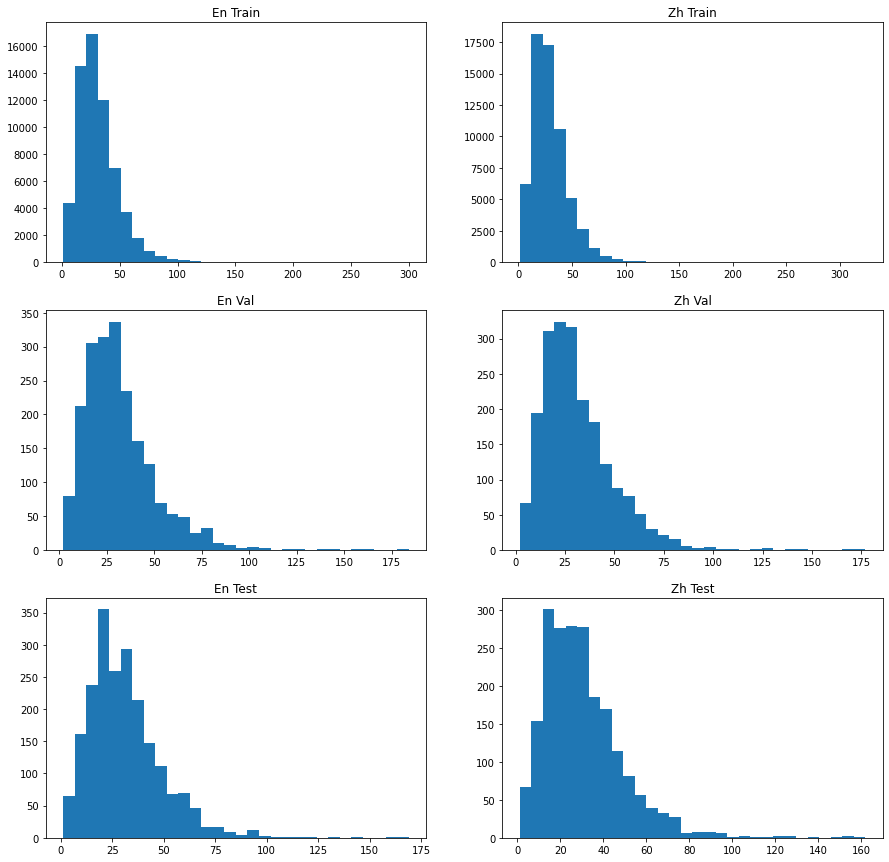

In [8]:
# Distribution of length of the sentence
EnLenTr, ZhLenTr = [len(i.split(' ')) for i in medEnTr], [len(i.split(' ')) for i in medZhTr]
EnLenVal, ZhLenVal = [len(i.split(' ')) for i in medEnVal], [len(i.split(' ')) for i in medZhVal]
EnLenTest, ZhLenTest = [len(i.split(' ')) for i in medEnTest], [len(i.split(' ')) for i in medZhTest]

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

%matplotlib inline

# plt.hist(EnLenTr,  bins=30)  # density=False would make counts
# plt.ylabel('Count')
# plt.xlabel('Length');
# plt.title('EnLength')
# plt.hist(EnLenTr,  bins=30)  # density=False would make counts
# plt.ylabel('Count')
# plt.xlabel('Length');
# plt.title('EnLength')
figure(figsize=(10, 20), dpi=80)

fig, axis = plt.subplots(3, 2, figsize=(15,15))

# For train
axis[0, 0].hist(EnLenTr,  bins=30)
axis[0, 0].set_title("En Train")
  
# For train
axis[0, 1].hist(ZhLenTr,  bins=30)
axis[0, 1].set_title("Zh Train")

# For Val
axis[1, 0].hist(EnLenVal,  bins=30)
axis[1, 0].set_title("En Val")
  
# For Val
axis[1, 1].hist(ZhLenVal,  bins=30)
axis[1, 1].set_title("Zh Val")

# For Test
axis[2, 0].hist(EnLenTest,  bins=30)
axis[2, 0].set_title("En Test")
  
# For Test
axis[2, 1].hist(ZhLenTest,  bins=30)
axis[2, 1].set_title("Zh Test")

plt.show()


## Benchmark

#### import model and tokenizer

In [4]:
# medEnTr,medZhTr = read_file(medEnTrPath), read_file(medZhTrPath)
# medEnVal,medZhVal = read_file(medEnValPath), read_file(medZhValPath)
# medEnTest,medZhTest = read_file(medEnTestPath), read_file(medZhTestPath)

from transformers import MarianMTModel, MarianTokenizer
import sentencepiece
from datasets import load_metric
from nltk.translate.bleu_score import sentence_bleu

metric = load_metric("bleu")

model_name = 'Helsinki-NLP/opus-mt-en-zh'
# model_name = 'Helsinki-NLP/opus-mt-en-ROMANCE'
tokenizer = MarianTokenizer.from_pretrained(model_name)

#### Evaluate

In [6]:
# Evaluate
# model = MarianMTModel.from_pretrained(model_name)
# translated = model.generate(**tokenizer(medEnTest[:5], return_tensors="pt", padding=True))

# hyps = tokenizer.batch_decode(translated, skip_special_tokens=True)
# refs = medZhTest[:5]

model = MarianMTModel.from_pretrained(model_name)
translated = []
for i in [medEnTest[:400], medEnTest[400:800], medEnTest[800:1200], medEnTest[1200:1600], medEnTest[1600:2000], medEnTest[2000:]]:
  tmp = model.generate(**tokenizer(i, return_tensors="pt", padding=True))
  translated += tmp

hyps = tokenizer.batch_decode(translated, skip_special_tokens=True)
refs = medZhTest

KeyboardInterrupt: ignored

In [ ]:
translated[:2]

In [ ]:
# Define evaluation metric

import sacrebleu

blue_scorer = sacrebleu.metrics.bleu.BLEU(

        lowercase = False,

        force = True,

        tokenize = 'none',

        smooth_method = 'exp',

        smooth_value = None,

        max_ngram_order = 4,

        effective_order = False,

    )


In [15]:
hyps[0]

'asciminib是一种止血抑制剂,它将BCR@-@ABL1蛋白质的神基网站捆绑在一起,将BCR@-@ABL1锁定为不活动配方,通过不同于所有其他ABL的顺带抑制剂的机制。'

In [16]:
refs[0]

'asciminib 是 与 BCR - ABL1 蛋白 的 豆蔻 酰 位点 相结合 的 别构抑制 剂 , 它 可 通过 不同于 所有 其他 ABL 激酶 抑制剂 的 机制 将 BCR - ABL1 锁定 在 非 活性 构象 .'

In [19]:
blue_scorer.corpus_score(hyps[0], [refs[0]])

BLEU = 0.00 12.8/0.0/0.0/0.0 (BP = 1.000 ratio = 1.458 hyp_len = 86 ref_len = 59)

#### Apparently, they are differently. We need to transform the two result into the same form to compare

In [ ]:
import re
def seg_char(sent):
    """
    Split the sentence based on words without destroying english and symbol
    """
    # First split english and symbol
    pattern_char_1 = re.compile(r'([\W])')
    parts = pattern_char_1.split(sent)
    parts = [p for p in parts if len(p.strip())>0]
    # Split Chinese
    pattern = re.compile(r'([\u4e00-\u9fa5])')
    chars = pattern.split(sent)
    chars = [w.strip() for w in chars if len(w.strip())>0]
    chars = ' '.join(chars)
    return chars

# blue_scorer.corpus_score(hyps[0], [refs[0]])
seg_char(hyps[0]), seg_char(refs[0])

In [33]:
[[seg_char(i) for i in refs[:2]]]

[['asciminib 是 与 BCR - ABL1 蛋 白 的 豆 蔻 酰 位 点 相 结 合 的 别 构 抑 制 剂 , 它 可 通 过 不 同 于 所 有 其 他 ABL 激 酶 抑 制 剂 的 机 制 将 BCR - ABL1 锁 定 在 非 活 性 构 象 .',
  'asciminib 同 时 靶 向 作 用 于 天 然 和 突 变 的 BCR - ABL1 , 包 括 看 门 基 因 ( gatekeeper ) T315I 突 变 体 .']]

#### Let's evaluate on the entire test dataset

In [37]:
MarianMT_blue = blue_scorer.corpus_score([seg_char(i) for i in hyps], [[seg_char(i) for i in refs]])
MarianMT_blue, MarianMT_blue.score

BLEU = 15.45 53.9/33.1/20.8/15.5 (BP = 0.561 ratio = 0.634 hyp_len = 128 ref_len = 202)

In [ ]:
MarianMT_blue = blue_scorer.corpus_score([seg_char(i) for i in hyps], [[seg_char(i) for i in refs]])
MarianMT_blue, MarianMT_blue.score

#### Finetune and Re-evaluate

##### Import tokenizer

In [4]:
from transformers import AutoTokenizer

model_checkpoint = 'Helsinki-NLP/opus-mt-en-zh'
    
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

# model_name = 'Helsinki-NLP/opus-mt-en-zh'
# # model_name = 'Helsinki-NLP/opus-mt-en-ROMANCE'
# tokenizer = MarianTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/786k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.54M [00:00<?, ?B/s]

In [5]:
tokenizer('hello')

{'input_ids': [23675, 0], 'attention_mask': [1, 1]}

In [6]:
!pip3 install torch torchvision

In [24]:
medEnTr[:2]

['probably not : analysis suggests minimal effect of HT in maintaining lean body mass .',
 'age @-@ related loss of muscle mass ( sarcopenia ) is an important predictor of impaired mobility .']

In [6]:
max_input_length = 128
max_target_length = 128
source_lang = "en"
target_lang = "zh"

def preprocess_function(inputs, targets):
    # inputs = [prefix + ex[source_lang] for ex in examples["translation"]]
    # targets = [ex[target_lang] for ex in examples["translation"]]
    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=max_target_length, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [19]:

import torch
# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, inputs):
        self.inputs = inputs['input_ids']
        self.targets = inputs['labels']
        self.mask = inputs['attention_mask']

    # def __getitem__(self, idx):
    #     item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    #     item['labels'] = torch.tensor(self.labels[idx])
    #     return item

    def __len__(self):
        return len(self.targets) 

    def __getitem__(self, index):
        input_ids = torch.tensor(self.inputs[index]).squeeze()
        target_ids = torch.tensor(self.targets[index]).squeeze()
        mask_ids = torch.tensor(self.mask[index]).squeeze()
        
        return {"input_ids": input_ids, "labels": target_ids, 'attention_mask':mask_ids}

# tokenized_datasets = preprocess_function(medEnTr[:100], medZhTr[:100])
tokenized_datasets = preprocess_function(medEnTr, medZhTr)
TrainDf = Dataset(tokenized_datasets)

ValDf = Dataset(preprocess_function(medEnVal, medZhVal))

TestDf = Dataset(preprocess_function(medEnTest, medZhTest))
# training_set = Dataset(X_train_tokenized, y_train_tokenized)
# validation_set = Dataset(X_val_tokenized, y_val_tokenized)

In [54]:
# tokenized_datasets = raw_datasets.map(preprocess_function, batched=True)
# tokenized_datasets = preprocess_function(medEnTr[:100], medZhTr[:100])

In [40]:
preprocess_function(medEnTr[:2], medZhTr[:2])

{'input_ids': [[5961, 56, 8, 37, 1550, 11931, 22602, 1766, 4, 1541, 1582, 11, 5119, 44083, 1669, 3196, 8, 6, 0], [1557, 8, 3376, 16, 3376, 465, 2686, 4, 42731, 3196, 22, 98, 2725, 149, 38435, 5097, 8, 17, 32, 59, 435, 30222, 695, 4, 37399, 9608, 8, 6, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], 'labels': [[7057, 10373, 8, 37, 8, 1390, 12363, 8, 33392, 8, 16334, 9019, 8, 24383, 106, 8, 2039, 4734, 8, 33164, 8, 26456, 8, 199, 8, 1402, 8, 21767, 8, 6, 0], [8, 67, 8, 22249, 2554, 8, 1189, 8, 12, 8, 42544, 8, 42508, 13859, 1098, 8, 295, 8, 848, 8, 3940, 8, 12, 8, 1729, 8, 5160, 8, 2068, 8, 6, 0]]}

In [8]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/298M [00:00<?, ?B/s]

In [23]:
batch_size = 16
model_name = model_checkpoint.split("/")[-1]
args = Seq2SeqTrainingArguments(
    f"{model_name}-finetuned-{source_lang}-to-{target_lang}",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=5,
    predict_with_generate=True,
    # fp16=True,
    push_to_hub=True,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [21]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [22]:
import numpy as np

metric = load_metric("sacrebleu")

def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [[label.strip()] for label in labels]

    return preds, labels

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    # Replace -100 in the labels as we can't decode them.
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Some simple post-processing
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    result = metric.compute(predictions=decoded_preds, references=decoded_labels)
    result = {"bleu": result["score"]}

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds]
    result["gen_len"] = np.mean(prediction_lens)
    result = {k: round(v, 4) for k, v in result.items()}
    return result

In [12]:
# 

In [13]:
# !git clone https://github.com/NVIDIA/apex
# !cd apex
# !pip install -v --disable-pip-version-check --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

In [26]:
# medEnTr,medZhTr
from datasets import load_dataset, load_metric
import numpy as np

trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=TrainDf,
    eval_dataset=ValDf,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [27]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 62127
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 19415


Epoch,Training Loss,Validation Loss,Bleu,Gen Len
1,0.782700,0.739322,40.617300,60.361500
2,0.664700,0.679100,42.595000,60.337400
3,0.604200,0.651756,43.188200,59.963700


Saving model checkpoint to opus-mt-en-zh-finetuned-en-to-zh/checkpoint-500
Configuration saved in opus-mt-en-zh-finetuned-en-to-zh/checkpoint-500/config.json
Model weights saved in opus-mt-en-zh-finetuned-en-to-zh/checkpoint-500/pytorch_model.bin
tokenizer config file saved in opus-mt-en-zh-finetuned-en-to-zh/checkpoint-500/tokenizer_config.json
Special tokens file saved in opus-mt-en-zh-finetuned-en-to-zh/checkpoint-500/special_tokens_map.json
Saving model checkpoint to opus-mt-en-zh-finetuned-en-to-zh/checkpoint-1000
Configuration saved in opus-mt-en-zh-finetuned-en-to-zh/checkpoint-1000/config.json
Model weights saved in opus-mt-en-zh-finetuned-en-to-zh/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in opus-mt-en-zh-finetuned-en-to-zh/checkpoint-1000/tokenizer_config.json
Special tokens file saved in opus-mt-en-zh-finetuned-en-to-zh/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to opus-mt-en-zh-finetuned-en-to-zh/checkpoint-1500
Configuration saved i

Epoch,Training Loss,Validation Loss,Bleu,Gen Len
1,0.782700,0.739322,40.617300,60.361500
2,0.664700,0.679100,42.595000,60.337400
3,0.604200,0.651756,43.188200,59.963700
4,0.561300,0.642584,44.043100,60.144400
5,0.535900,0.636809,44.264200,60.291700


Saving model checkpoint to opus-mt-en-zh-finetuned-en-to-zh/checkpoint-15500
Configuration saved in opus-mt-en-zh-finetuned-en-to-zh/checkpoint-15500/config.json
Model weights saved in opus-mt-en-zh-finetuned-en-to-zh/checkpoint-15500/pytorch_model.bin
tokenizer config file saved in opus-mt-en-zh-finetuned-en-to-zh/checkpoint-15500/tokenizer_config.json
Special tokens file saved in opus-mt-en-zh-finetuned-en-to-zh/checkpoint-15500/special_tokens_map.json
Deleting older checkpoint [opus-mt-en-zh-finetuned-en-to-zh/checkpoint-14000] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 2036
  Batch size = 16
Saving model checkpoint to opus-mt-en-zh-finetuned-en-to-zh/checkpoint-16000
Configuration saved in opus-mt-en-zh-finetuned-en-to-zh/checkpoint-16000/config.json
Model weights saved in opus-mt-en-zh-finetuned-en-to-zh/checkpoint-16000/pytorch_model.bin
tokenizer config file saved in opus-mt-en-zh-finetuned-en-to-zh/checkpoint-16000/tokenizer_config.json
Special

TrainOutput(global_step=19415, training_loss=0.6650085802886279, metrics={'train_runtime': 7765.174, 'train_samples_per_second': 40.004, 'train_steps_per_second': 2.5, 'total_flos': 8113292395020288.0, 'train_loss': 0.6650085802886279, 'epoch': 5.0})

#### Save the model

In [29]:
from huggingface_hub import notebook_login

notebook_login()

ERROR:root:HfApi.login: This method is deprecated in favor of `set_access_token`.


Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [35]:
model_checkpoint = "Helsinki-NLP/opus-mt-en-zh"
model.push_to_hub(model_checkpoint)


/usr/local/lib/python3.7/dist-packages/huggingface_hub/hf_api.py:1004: FutureWarning: `create_repo` now takes `token` as an optional positional argument. Be sure to adapt your code!
  FutureWarning,
Cloning https://huggingface.co/countrysideid/opus-mt-en-zh into local empty directory.
Configuration saved in Helsinki-NLP/opus-mt-en-zh/config.json
Model weights saved in Helsinki-NLP/opus-mt-en-zh/pytorch_model.bin


Upload file pytorch_model.bin:   0%|          | 3.38k/296M [00:00<?, ?B/s]

To https://huggingface.co/countrysideid/opus-mt-en-zh
   83f1e71..ce66f7c  main -> main

   83f1e71..ce66f7c  main -> main



'https://huggingface.co/countrysideid/opus-mt-en-zh/commit/ce66f7c6d19c324e8931b2ab6d6c65db024d8b1e'

In [36]:
# trainer.push_to_hub()

#### Inference and Evaluate

In [8]:
from transformers import MarianMTModel, MarianTokenizer
from transformers import AutoTokenizer

model_name = 'Helsinki-NLP/opus-mt-en-zh'
# model_name = 'Helsinki-NLP/opus-mt-en-ROMANCE'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model_checkpoint = "countrysideid/opus-mt-en-zh-chk1"
new_model = MarianMTModel.from_pretrained(model_checkpoint)
# new_model.generate(**tokenizer(src_text, return_tensors="pt", padding=True))

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/296M [00:00<?, ?B/s]

In [11]:

# model_name = 'opus-mt-en-ro-finetuned-en-to-ro/checkpoint-38000'
# tokenizer = MarianTokenizer.from_pretrained(model_name)
# # model = MarianMTModel.from_pretrained(model_name)
# translated = model.generate(**tokenizer(src_text, return_tensors="pt", padding=True))
# [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

new_model.cpu()
translated = new_model.generate(**tokenizer(medEnTest[:300], return_tensors="pt", padding=True))
hyps = tokenizer.batch_decode(translated, skip_special_tokens=True)
refs = medZhTest[:300]

import sacrebleu

blue_scorer = sacrebleu.metrics.bleu.BLEU(
        lowercase = False,
        force = True,
        tokenize = 'none',
        smooth_method = 'exp',
        smooth_value = None,
        max_ngram_order = 4,
        effective_order = False
    )

In [12]:
import re
def seg_char(sent):
    """
    Split the sentence based on words without destroying english and symbol
    """
    # First split english and symbol
    pattern_char_1 = re.compile(r'([\W])')
    parts = pattern_char_1.split(sent)
    parts = [p for p in parts if len(p.strip())>0]
    # Split Chinese
    pattern = re.compile(r'([\u4e00-\u9fa5])')
    chars = pattern.split(sent)
    chars = [w.strip() for w in chars if len(w.strip())>0]
    chars = ' '.join(chars)
    return chars

In [13]:
MarianMT_blue = blue_scorer.corpus_score([seg_char(i) for i in hyps], [[seg_char(i) for i in refs]])
MarianMT_blue, MarianMT_blue.score

(BLEU = 48.05 79.1/60.1/46.1/36.4 (BP = 0.905 ratio = 0.909 hyp_len = 14202 ref_len = 15625),
 48.04696058037501)